# Guided Project: Investigating Fandango Movie Ratings

In this project we will analyze and compare [Fandango](https://www.fandango.com/) movie ratings before and after [Walt Hickey article](https://fivethirtyeight.com/features/fandango-movies-ratings/) published in October 2015. Hickey found that the actual rating was almost always rounded up to the nearest half-star, which means the rating system was biased and dishonest.

## Understanding the data

Two datasets we are going to use:
* [Walt Hickey on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango): data was pulled on August 24, 2015 to compare text and star based rating
    * It contains every movie that has at least 30 fan reviews on Fandango
    * And only if movie has RT, Metacritic and IMDb score


* [mircealex on GitHub](https://github.com/mircealex/Movie_ratings_2016_17): data was pulled on March 22, 2017
    * Data for the most popular movies (with a significant number of votes)
    * And only for movies released in 2016 and 2017
    
Sampling criteria for datasets make our data unrepresentative on global level. So let's clarify, that we will compare difference between Fandangos ratings for popular movies released in 2015 and 2016.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
prev_df = pd.read_csv('fandango_score_comparison.csv')
after_df = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
prev_df = prev_df[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after_df = after_df[['movie', 'year', 'fandango']]

In [ ]:
print('2015   ', prev_df.shape)
print('2016-17', after_df.shape)

2015    (146, 5)
2016-17 (214, 3)


In [ ]:
prev_df.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [ ]:
after_df.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Isolating the Samples We Need

We know that each dataset contain movies at least for two near years. For our analysis purposes we will keep movies released only in 2015 and 2016 years.

In [ ]:
prev_df['year'] = prev_df['FILM'].str[-5:-1].astype(int)
prev_df['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [ ]:
fandango_2015_df = prev_df.loc[prev_df['year'] == 2015, ['FILM', 'year', 'Fandango_Stars']]
fandango_2015_df = fandango_2015_df.rename(columns={'FILM': 'movie', 'Fandango_Stars': 'stars'})
fandango_2015_df.head()

,movie,year,stars
0,Avengers: Age of Ultron (2015),2015,5.0
1,Cinderella (2015),2015,5.0
2,Ant-Man (2015),2015,5.0
3,Do You Believe? (2015),2015,5.0
4,Hot Tub Time Machine 2 (2015),2015,3.5


In [ ]:
after_df['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [ ]:
fandango_2016_df = after_df[after_df['year'] == 2016]
fandango_2016_df = fandango_2016_df.rename(columns={'fandango': 'stars'})
fandango_2016_df.head()

,movie,year,stars
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Distribution Shapes for 2015 and 2016

Let's start comparing distribution shapes using box plot and kernel density plot.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



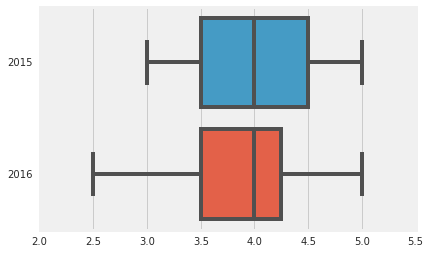

In [ ]:
fandango_df = pd.concat([fandango_2015_df, fandango_2016_df])
sns.boxplot(data=fandango_df, y='year', x='stars', orient='horizontal').set_xlim(2, 5.5)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
fandango_2015_df['stars'].plot.kde(label='2015', legend=True, figsize=(10,6), xlim=(1,5), xticks=(np.arange(1, 5.1, 0.5)))
fandango_2016_df['stars'].plot.kde(label='2016', legend=True, title='Distribution shapes for Fandangos ratings \n 2015 vs 2016')

* Both distributions are **left skewed**: movies are given mostly high fan ratings
* 2016 distribution is **shifted to the left**: 2016 popular movies are rated slightly lower than 2015 popular movies.

## Comparing Relative Frequencies

In order to provide concrete comparison numbers let's compare percentages of star values occurrences.

In [ ]:
relative_df = fandango_df.pivot_table(index='stars', columns='year', aggfunc='count')
relative_df = ((relative_df / relative_df.sum()) * 100) # absolute to relative

In [ ]:
relative_df

In [ ]:
relative_df.plot.bar(rot=0)
plt.legend([2015, 2016], bbox_to_anchor=(1.2, 1))
plt.xlabel('')

* 2016 year has **significantly lower** percentages for 4.5 and 5.0 stars resulting **19%** difference: 
    * 2015: 4.5 (**38%**) and 5.0 (**7%**)
    * 2016: 4.5 (**25%**) and 5.0 (**1%**)
* Minimal rating in 2015 year was 3.0 stars vs 2.5 stars in 2016
* The percentage went up for 3.5 and 4.0 stars in 2016

## Determining the Direction of the Change

For each sample we will compute its mean, median and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [ ]:
direction_df = fandango_df.pivot_table(index='year', values='stars',
                                       aggfunc=[np.mean, np.median, lambda x: x.mode()[0]])
direction_df.columns = ['mean', 'median', 'mode']
direction_df = direction_df.T
direction_df

In [ ]:
direction_df.plot.barh()
plt.legend(bbox_to_anchor=(1.2, 1))

In [ ]:
diff = direction_df.loc['mean', 2015] - direction_df.loc['mean', 2016]
drop_pct = diff / direction_df.loc['mean', 2015]
print('Mean difference: ', round(diff, 2), 'stars')
print('Drop percentage: ', round(drop_pct * 100, 2), '%')

The mean rating is lower in 2016 with 0.2 stars (5%). Mode also is lower (4.0 stars vs 4.5).